# Homework 5

 ### Due: Tuesday Nov 21, at 11:59pm via Blackboard


Import the necessary panda libraries

In [2]:
import numpy as np # for mathematical caluclations
import pandas as pd 
from datetime import datetime  # to access datetime
import scipy.stats as stats

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')


Q1. The stacked bar graph below shows the results of Pew Research Center's study on Trust in different levels of Government by the American public. Using plotly graph objects, re-create the bar graph below. (3 points)



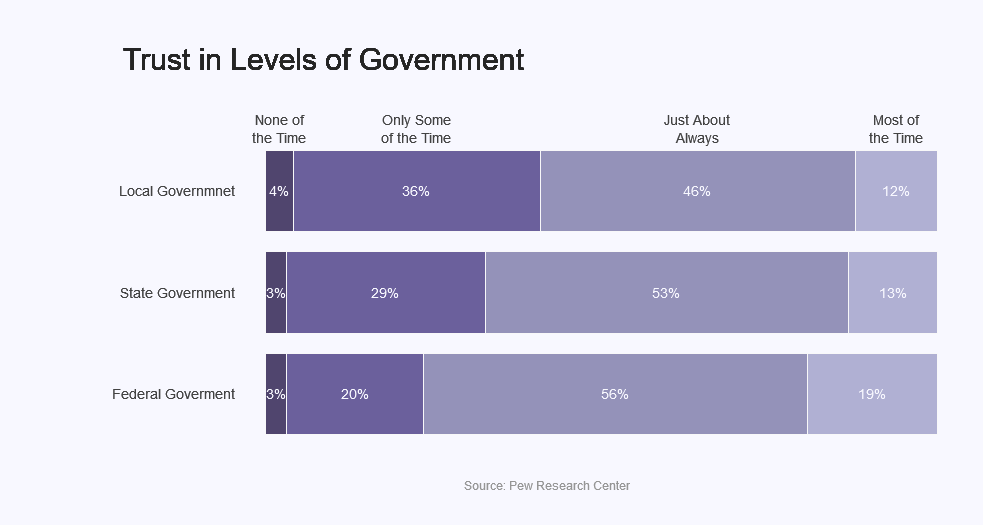










In [ ]:
import plotly.graph_objects as go

top_labels = ['None of<br>the Time', 'Only Some<br>of the Time', 'Just About<br>Always', 'Most of<br>the Time']

# colors are arranged from darkets to lightest
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# each list have the distribution of responses 
x_data = [[4, 36, 46, 12],
          [3, 29, 53, 13],
          [3, 20, 56, 19]]

# the list of questions
y_data = ['Federal Government',
          'State Government', 
          'Local Government']


fig = go.Figure()

# outer loop: 5 times (scale: Strongly agree, Agree, etc.)
# inner loop: 4 times (4 questions each with a list of responses)
# for each of the 5 scales (i), and for each question (yd) with its list of responses (xd[i]):
#   # Create a barchart for each question and its corresponding list of 5 ratings


for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

# update the layout of the figure: 
# 1. get rid of all grids, lines, ticklabels on both x and y axis 
# 2. update the bar chart to a stack barchart using `barmode = 'stack'`
# 3. get rid of the legend 
# 4. update the margines lengths
# 5. set the plot and paper background color to white

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack', # change type of barchart to stacked
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

fig.update_layout(
    title="<b>Trust in Levels of Government</b>",
    font=dict(
        size=20
    )
    
    
)

# fig.update_layout(xaxis_title="X Axis Title", font=dict(size=18), xaxis=dict(anchor="y2"))



# let's add the annotations to each 'box' on the graph
# add labels for the axes

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis: questions
    annotations.append(dict(xref='paper', #x = 0.14 in referance to the whole figure (paper)
                            yref='y', # y= yd in reference to the regular y axis on the plot
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    
    
    # # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd, # to center the position for x, divide by 2
                            text=str(xd[0]) + '%', # this is the real value of x (the one to show)
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    #labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.3,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                            color='rgb(67, 67, 67)'),
                                showarrow=False))
    
    # In the following loop, we go over the rest of labels
    space = xd[0] # how much space is needed between each label (Strongly agree, agree, etc.)
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                                color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.3,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                    color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.add_annotation(dict(font=dict(color='gray',size=12),
                                        y=-0.5,
                                        showarrow=False,
                                        text="Source: Pew Research Center",
                                        textangle=0,
                                        xanchor='center',
                                        xref="paper",
                                        yref="paper"))


fig.show()

Q2.The plot below shows the total population by county of the states of Illinois, Michigan and Wisconsin. Import the csv file 'population' and using plotly's choropleth mapbox function, re-create the plot below. (3 points)





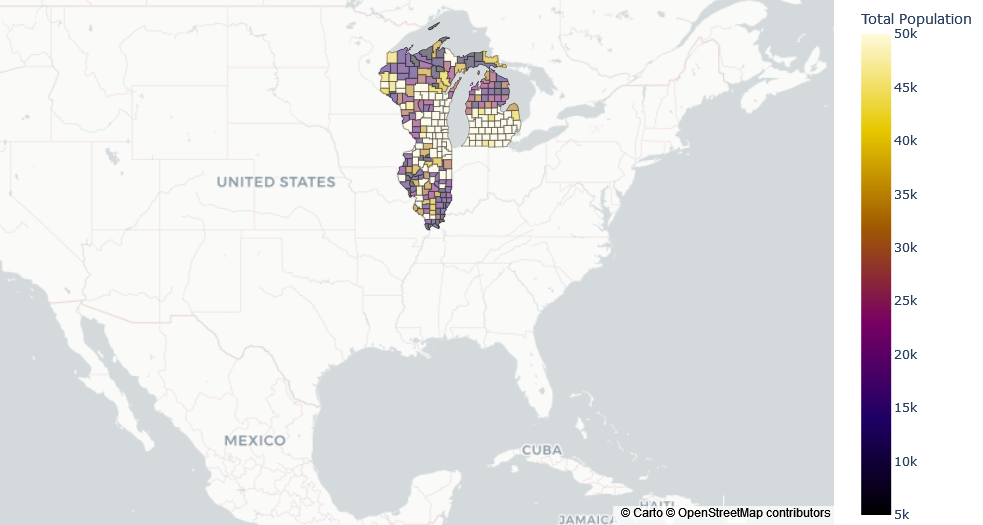

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("population.csv", dtype={"FIPS": str})  # Updated column name to match the CSV file

states_to_include = ['Illinois', 'Michigan', 'Wisconsin']  # Full state names

df_filtered = df[df['STNAME'].isin(states_to_include)]

import plotly.express as px

fig = px.choropleth_mapbox(df_filtered, geojson=counties, locations='FIPS', color='TOT_POP',  # Updated column name
                           color_continuous_scale="electric",
                           range_color=(5000, 50000),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 36.7782, "lon": -90.4179},
                           opacity=0.5,
                           labels={'TOT_POP': 'Total Population'}  # Updated label name
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Q3. The Excel file "ConSpend" shows the consumer spending patterns (Sales) by several variables including gender, when the purchase was made (day), payment method type. Import the file. We are interesteed to see if there is a difference between weekend and weekday spenings. Create a new categorial variable "Weekend" that classifies the "day" into weekend if its Friday, Saturday or Sunday, and weekday otherwise. (3 points)  

Using Seaborn, create a histogram showing Sales for weekend and weekdays, with a transparanecy of 0.3 (2 points)

In [ ]:
import seaborn as sns
plt.style.use('default')
conspend = pd.read_excel('ConSpend.xlsx')
conspend['Weekend'] = ['Weekend' if x in ['Sunday', 'Saturday', 'Friday'] else 'Weekday' for x in conspend['Day']]
sns.histplot(conspend, x="Sales", hue="Weekend", element="step", alpha = 0.3)

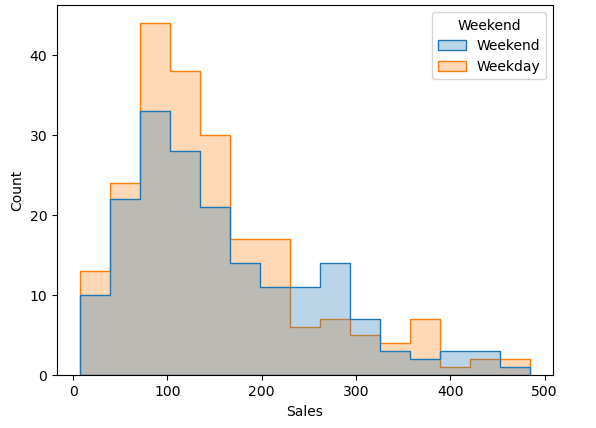

Q4. Using plotly, create overlapping histograms that show the sales by weekdays and weekends, with an opacity of 0,3. Pass the 'marginal' argument into the function to also show a "box" plot." Also, set x-axis ticks to '50' and the plot background color to white (4 points).

In [ ]:
import plotly.express as px
fig = px.histogram(conspend, x="Sales", color="Weekend",
                   marginal="box", # or violin, rug
                   hover_data=conspend.columns,
                   width=800, height=600,
                   title='Sales by Weekend versus Weekdays',
                   # template='simple_white', 
           
                   )
fig.update_traces(opacity=.3)
fig.update_layout(barmode = 'overlay', plot_bgcolor = ('rgba(0, 0, 0, 0)'))
# fig.update_xaxes(dtick = 50, ticks = 'outside', showline = True, linecolor = 'black', mirror = False)

fig.show()


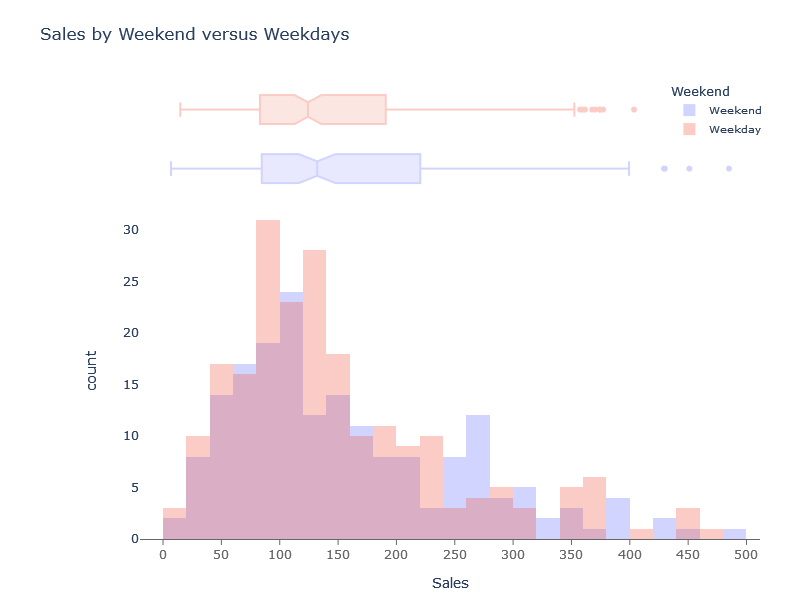




Q5. Using Seaborn, create boxplots showing Sales for weekend and weekdays and eliminated the outliers (2 points)

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.boxplot(conspend, y = 'Sales', x = 'Weekend',showfliers=False)
sns.despine()

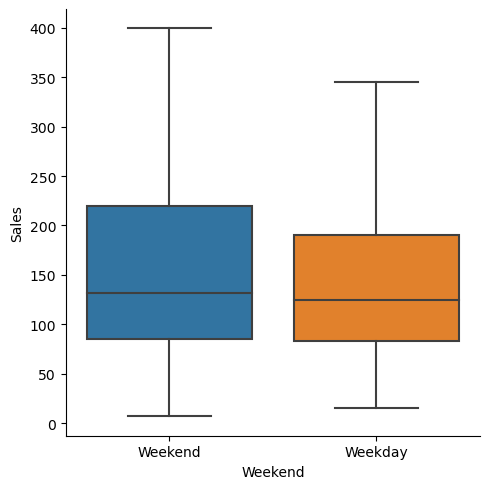

Q6. Using plotly, create box plots to show weekend versu weekday sales, differentiated by color.Alos show the distribution of data points on the plot (2 points).

In [ ]:
import plotly.express as px
fig = px.box(conspend, x="Weekend", y="Sales", points='all', color="Weekend", color_discrete_sequence=['blue', 'green'], width=1000, height=600)
fig.show()

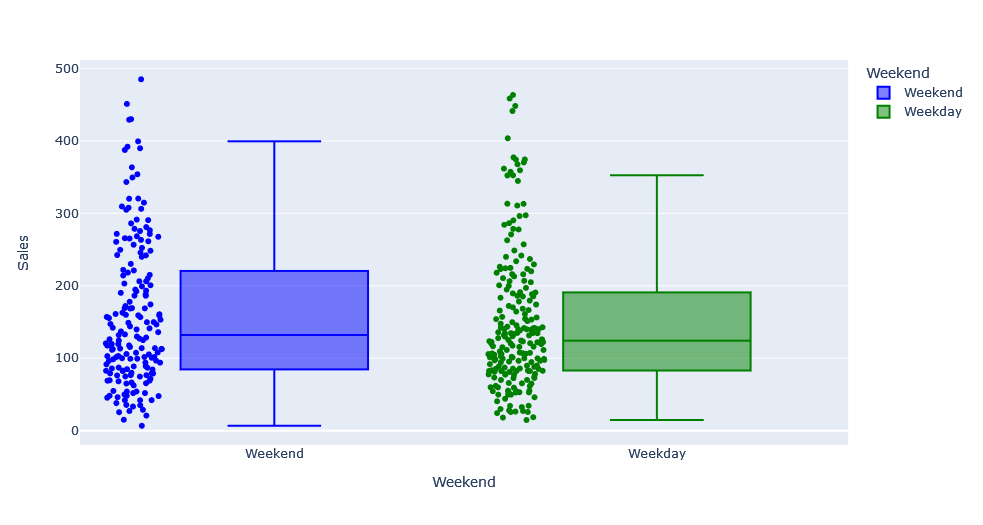

Q7. Generate the summary statistics for weekend and weekday sales. Is there a difference in the value of the sample means? (2 points)

In [ ]:
conspend[['Weekend', 'Sales']].groupby('Weekend').describe()

<b>Summary</b>: Seeing the summary statistics, there is difference of sample means value between weekend and weekday

Q8. At an alpha of 0.05, is there a statitsical difference between sales on weekday versus weekends? Show your statitscal test and explain. (4 points)

In [ ]:
stats.ttest_ind(a=conspend[conspend.Weekend == 'Weekend']['Sales'], b=conspend[conspend.Weekend == 'Weekday']['Sales'], equal_var=True)

<b>Summary</b>: Seeing the statistics test, there is no statistical difference of sample means value between weekend and weekday since the p-value obtained from the test is above 0.05